# **Práctica Final por Equipo, Propedéutico de Estadística Verano 2020**
____________________________________________________________________________________________________________

### **Análisis descriptivo de los Taxis Verdes de la Ciudad de Nueva York durante 2019 en R, utilizando la paquetería de tidyverse, R base, FinCal y PropCIs y las librerías de readr, ggplot2, modeest, stats**

### **Profr.** Erick Palacios Moreno
### **Equipo 8**
### **Integrantes**
#### Carlos Garza Bracamontes (carlosgarza-3)
#### Enrique Ortiz Casillas (EnriqueOrtiz27)
#### Octavio Fuentes Ortiz (ofuentesitam)
#### **Fecha de Entrega:** 19/07/2020
____________________________________________________________________________________________________________

**La base de datos de los Taxis Verdes, la obtuvimos de la página del Gobierno de la Ciudad de Nueva York.**

**La base de datos se puede consultar en:**  *[Green Taxi Trip Records NYC](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)* **.**

**El diccionario de datos se puede consultar en:**  *[Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf)* **.**
____________________________________________________________________________________________________________

**Paqueterías utilizadas:**

- *[tidyverse](https://www.tidyverse.org/)*.

In [1]:
#install.packages("tidyverse")
library(tidyverse) #ggplot2,tibble,tidyr,readr,purrr,dplyr,stringr,forcats

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



- *[modeest](https://www.rdocumentation.org/packages/modeest/versions/2.4.0#:~:text=modeest%3A%20Estimation%20of%20the%20mode,modes%20of%20usual%20probability%20distributions.)*.

In [2]:
#install.packages("modeest")
library(modeest)

Warning message:
"package 'modeest' was built under R version 3.6.3"
Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr



- *[FinCal](https://cran.r-project.org/web/packages/FinCal/FinCal.pdf)*.

In [149]:
#install.packages("FinCal")
library(FinCal)

Warning message:
"package 'FinCal' was built under R version 3.6.3"


- *[R base](https://rstudio.com/wp-content/uploads/2016/05/base-r.pdf)*.

- *[PropCIs](https://cran.r-project.org/web/packages/PropCIs/PropCIs.pdf)*.

In [181]:
#install.packages("PropCIs")
library(PropCIs)

**Librerías utilizadas:**

- *[readr](https://readr.tidyverse.org/)*.

In [3]:
library(readr)

- *[ggplot2](https://ggplot2.tidyverse.org/)*.

In [2]:
library(ggplot2)

- *[stats](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/stats-package.html)*.

In [159]:
library(stats)

____________________________________________________________________________________________________________

Establecemos el directorio donde tenemos nuestras BBDD:

In [82]:
setwd("C:/Users/ofuentes/Desktop/green_taxi_records")

____________________________________________________________________________________________________________

#### ___LIMPIEZA DE DATOS___ 

Antes de empezar con el análisis descriptivo de nuestros datos es necesario saber con qué datos estamos trabajando y sobretodo, si éstos están limpios. El procedimiento y explicación de nuestra limpieza de datos, se encuentra en el repositorio de nuestra Práctica Final: [data_exploration.ipynb](https://github.com/prope-2020-gh-classroom/practica-final-por-equipos-verano-2020-itam-carlosgarza-3/blob/master/tercer_cuatrimestre/data_exploration.ipynb).

Nuestras funciones de limpieza y adición de columnas, se resumen en la función **"data_pipeline"**:

In [3]:
clean_dataframe <- function(data_frame) {
    #function to remove unnecessary cols in r dataframe and na's
    data_frame$VendorID <- NULL
    data_frame$store_and_fwd_flag <- NULL
    data_frame$PULocationID <- NULL
    data_frame$DOLocationID <- NULL
    data_frame$RatecodeID <- NULL
    data_frame$ehail_fee <- NULL
    data_frame$improvement_surcharge <- NULL 
    data_frame$tolls_amount <- NULL 
    data_frame$mta_tax <- NULL 
    data_frame$extra <- NULL 
    data_frame$congestion_surcharge <- NULL
    return(data_frame[complete.cases(data_frame),])
}


add_columns <- function(data_frame, month) {
    #function to add 2 columns to data frame to improve analysis
    #first we add trip duration in hours
    data_frame$lpep_dropoff_datetime <- as.POSIXct(data_frame$lpep_dropoff_datetime,
                                      format='%Y-%m-%d %H:%M:%S')
    data_frame$lpep_pickup_datetime <- as.POSIXct(data_frame$lpep_pickup_datetime,
                                      format='%Y-%m-%d %H:%M:%S')
    data_frame$trip_duration <- as.numeric(difftime(data_frame[,2], data_frame[,1], units="hours"))
    
    #then we add tip percentage
    data_frame$tip_pct <- data_frame$tip_amount / data_frame$total_amount
    data_frame$month <- month
    data_frame <- data_frame[data_frame$trip_duration<5,]
    data_frame <- data_frame[data_frame$total_amount > 0,]
    data_frame <- data_frame[data_frame$fare_amount > 0,]
    data_frame <- data_frame[data_frame$tip_amount > 0,]
    data_frame <- data_frame[data_frame$trip_duration >0,]
    data_frame <- data_frame[data_frame$trip_distance >0,]
    return(data_frame)
}


data_pipeline <- function(csv, month){
    #function to include all cleaning and transformation functions 
    data <- read.csv(csv)
    data <- clean_dataframe(data)
    data <- add_columns(data, month)
    return(data)
}

Aplicamos **data_pipeline** para el **primer cuatrimestre:**

In [85]:
enero_data <- data_pipeline('green_tripdata_2019-01.csv', 'Enero')
febrero_data <- data_pipeline('green_tripdata_2019-02.csv', 'Febrero')
marzo_data <- data_pipeline('green_tripdata_2019-03.csv', 'Marzo')
abril_data <- data_pipeline('green_tripdata_2019-04.csv', 'Abril')

Juntamos nuestro **primer cuatrimestre** y lo exportamos a un archivo .csv (para posteriormente leerlo):

In [86]:
cuatrimestre1_data <- bind_rows(enero_data, febrero_data, marzo_data, abril_data)
write.csv(x = cuatrimestre1_data, file = "primer_cuatri.csv")
primer_cuatrimestre <- read_csv('primer_cuatri.csv')
# Colocamos nombre a las columnas:
colnames(primer_cuatrimestre) <- c("X1","Pick_up","Dropp_off","Passengers","Trip_distance","Fare_amount",
                                   "Tip_amount", "Total_amount","Payment_type", "Trip_type", "Trip_duration",
                                   "Tip_pct", "Month")

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_character(),
  lpep_pickup_datetime = col_datetime(format = ""),
  lpep_dropoff_datetime = col_datetime(format = ""),
  passenger_count = col_double(),
  trip_distance = col_double(),
  fare_amount = col_double(),
  tip_amount = col_double(),
  total_amount = col_double(),
  payment_type = col_double(),
  trip_type = col_double(),
  trip_duration = col_double(),
  tip_pct = col_double(),
  month = col_character()
)



Vemos la estructura de la base de datos ya limpia:

In [87]:
str(primer_cuatrimestre)

tibble [802,074 x 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1           : chr [1:802074] "...1" "...2" "...3" "...4" ...
 $ Pick_up      : POSIXct[1:802074], format: "2019-01-01 00:46:20" "2019-01-01 00:37:00" ...
 $ Dropp_off    : POSIXct[1:802074], format: "2019-01-01 01:04:54" "2019-01-01 00:56:42" ...
 $ Passengers   : num [1:802074] 2 1 2 1 1 1 1 1 1 5 ...
 $ Trip_distance: num [1:802074] 2.68 6.84 1.15 1.2 5.5 5.01 0.43 2.72 2.15 2.18 ...
 $ Fare_amount  : num [1:802074] 13.5 22 6.5 7.5 19.5 20 4 10.5 10.5 9.5 ...
 $ Tip_amount   : num [1:802074] 2.96 8 1.56 5.2 4.15 4.26 1.06 2.36 2.95 3.24 ...
 $ Total_amount : num [1:802074] 19.71 37.06 9.36 14 24.95 ...
 $ Payment_type : num [1:802074] 1 1 1 1 1 1 1 1 1 1 ...
 $ Trip_type    : num [1:802074] 1 1 1 1 1 1 1 1 1 1 ...
 $ Trip_duration: num [1:802074] 0.309 0.328 0.12 0.147 0.351 ...
 $ Tip_pct      : num [1:802074] 0.15 0.216 0.167 0.371 0.166 ...
 $ Month        : chr [1:802074] "Enero" "Enero" "Enero" "Enero" ...
 - attr

Vemos un resumen de cada una de las columnas de la base de datos antes de empezar:

In [110]:
summary(primer_cuatrimestre)

      X1               Pick_up                      Dropp_off                  
 Length:802074      Min.   :2009-01-01 00:12:45   Min.   :2009-01-01 00:22:56  
 Class :character   1st Qu.:2019-01-30 14:47:39   1st Qu.:2019-01-30 15:01:48  
 Mode  :character   Median :2019-02-28 14:12:57   Median :2019-02-28 14:26:24  
                    Mean   :2019-03-01 07:28:14   Mean   :2019-03-01 07:41:09  
                    3rd Qu.:2019-03-31 08:32:16   3rd Qu.:2019-03-31 08:42:11  
                    Max.   :2019-06-15 04:36:12   Max.   :2019-06-15 04:44:15  
                    NA's   :703                   NA's   :703                  
   Passengers    Trip_distance      Fare_amount       Tip_amount     
 Min.   :0.000   Min.   :  0.010   Min.   :  0.01   Min.   :  0.010  
 1st Qu.:1.000   1st Qu.:  1.100   1st Qu.:  6.50   1st Qu.:  1.460  
 Median :1.000   Median :  1.860   Median :  9.50   Median :  2.060  
 Mean   :1.326   Mean   :  2.772   Mean   : 11.93   Mean   :  2.652  
 3rd Qu.:1

____________________________________________________________________________________________________________

# ___PRIMER CUATRIMESTRE 2019___ 

- Nuestros datos se ven así:

In [10]:
# Enero
head(primer_cuatrimestre, n = 1)
# Abril
tail(primer_cuatrimestre, n = 1)

X1,Pick_up,Dropp_off,Passengers,Trip_distance,Fare_amount,Tip_amount,Total_amount,Payment_type,Trip_type,Trip_duration,Tip_pct,Month
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
...1,2019-01-01 00:46:20,2019-01-01 01:04:54,2,2.68,13.5,2.96,19.71,1,1,0.3094444,0.1501776,Enero


X1,Pick_up,Dropp_off,Passengers,Trip_distance,Fare_amount,Tip_amount,Total_amount,Payment_type,Trip_type,Trip_duration,Tip_pct,Month
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
514390,2019-04-30 23:40:13,2019-04-30 23:46:50,1,1.02,6.5,1.56,9.36,1,1,0.1102778,0.1666667,Abril


**Medidas de Tendencia Central** :

- Medias del **primer cuatrimestre**

In [151]:
# Media de pasajeros
passengers_mean <-as.numeric(format(round(mean(primer_cuatrimestre$Passengers, na.rm = TRUE), 2), nsmall = 2))
# Media de la distancia del viaje
trip_mean <- as.numeric(format(round(mean(primer_cuatrimestre$Trip_distance, na.rm = TRUE), 2), nsmall = 2))
# Media de la tarifa
fare_mean <- as.numeric(format(round(mean(primer_cuatrimestre$Fare_amount, na.rm = TRUE), 2), nsmall = 2))
# Media de la propina
tip_mean <- as.numeric(format(round(mean(primer_cuatrimestre$Tip_amount, na.rm = TRUE), 2), nsmall = 2))
# Media del costo total del viaje
total_mean <- as.numeric(format(round(mean(primer_cuatrimestre$Total_amount, na.rm = TRUE), 2), nsmall = 2))
# Media de la duración del viaje
duration_mean <- as.numeric(format(round(mean(primer_cuatrimestre$Trip_duration, na.rm = TRUE), 2), nsmall = 2))

In [152]:
columnas <- c("Media Pasajeros", "Media Distancia", "Media Tarifa", "Media Propina", "Media Costo Viaje",
             "Media Duración")
valores <- c(passengers_mean, trip_mean, fare_mean, tip_mean, total_mean, duration_mean)
medias_cuatrimestre <- data.frame(columnas, valores)

- Medianas del **primer cuatrimestre**

In [13]:
# Mediana de pasajeros
passengers_median <-as.numeric(format(round(median(primer_cuatrimestre$Passengers, na.rm = TRUE), 2), nsmall = 2))
# Mediana de la distancia del viaje
trip_median <- as.numeric(format(round(median(primer_cuatrimestre$Trip_distance, na.rm = TRUE), 2), nsmall = 2))
# Mediana de la tarifa
fare_median <- as.numeric(format(round(median(primer_cuatrimestre$Fare_amount, na.rm = TRUE), 2), nsmall = 2))
# Mediana de la propina
tip_median <- as.numeric(format(round(median(primer_cuatrimestre$Tip_amount, na.rm = TRUE), 2), nsmall = 2))
# Mediana del costo total del viaje
total_median <- as.numeric(format(round(median(primer_cuatrimestre$Total_amount, na.rm = TRUE), 2), nsmall = 2))
# Mediana de la duración del viaje
duration_median <- as.numeric(format(round(median(primer_cuatrimestre$Trip_duration, na.rm = TRUE), 2), nsmall = 2))

In [14]:
columnas_median <- c("Mediana Pasajeros", "Mediana Distancia", "Mediana Tarifa", "Mediana Propina", 
                     "Mediana Costo Viaje", "Mediana Duración")
valores_median <- c(passengers_median, trip_median, fare_median, tip_median, total_median, duration_median)
medianas_cuatrimestre <- data.frame(columnas_median, valores_median)

- Modas del **primer cuatrimestre**

In [15]:
# Moda de pasajeros
passengers_mode <-as.numeric(format(round(mfv(primer_cuatrimestre$Passengers, na_rm = TRUE), 2), nsmall = 2))
# Moda de la distancia del viaje
trip_mode <- as.numeric(format(round(mfv(primer_cuatrimestre$Trip_distance, na_rm = TRUE), 2), nsmall = 2))
# Moda de la tarifa
fare_mode <- as.numeric(format(round(mfv(primer_cuatrimestre$Fare_amount, na_rm = TRUE), 2), nsmall = 2))
# Moda de la propina
tip_mode <- as.numeric(format(round(mfv(primer_cuatrimestre$Tip_amount, na_rm = TRUE), 2), nsmall = 2)) 
# Moda del costo total del viaje
total_mode <- as.numeric(format(round(mfv(primer_cuatrimestre$Total_amount, na_rm = TRUE), 2), nsmall = 2)) 
# Moda de la duración del viaje
duration_mode <- as.numeric(format(round(mfv(primer_cuatrimestre$Trip_duration, na_rm = TRUE)), 2), nsmall = 2)

In [16]:
columnas_mode <- c("Moda Pasajeros", "Moda Distancia", "Moda Tarifa", "Moda Propina", "Moda Costo Viaje", 
                   "Moda Duración")
valores_mode <- c(passengers_mode, trip_mode, fare_mode, tip_mode, total_mode, duration_mode)
modas_cuatrimestre <- data.frame(columnas_mode, valores_mode)

**Las medias quedan así:**

In [88]:
print('Medias de todo el primer cuatrimestre')
medias_cuatrimestre

[1] "Medias de todo el primer cuatrimestre"


columnas,valores
<fct>,<dbl>
Media Pasajeros,1.33
Media Distancia,2.75
Media Tarifa,11.94
Media Propina,2.66
Media Costo Viaje,16.46
Media Duración,0.21


**Las medianas quedan así:**

In [89]:
print('Medianas de todo el primer cuatrimestre')
medianas_cuatrimestre

[1] "Medianas de todo el primer cuatrimestre"


columnas_median,valores_median
<fct>,<dbl>
Mediana Pasajeros,1.00
Mediana Distancia,1.83
Mediana Tarifa,9.50
Mediana Propina,2.06
Mediana Costo Viaje,12.96
Mediana Duración,0.17


**Las modas quedan así:**

In [90]:
print('Modas de todo el primer cuatrimestre')
modas_cuatrimestre

[1] "Modas de todo el primer cuatrimestre"


columnas_mode,valores_mode
<fct>,<dbl>
Moda Pasajeros,1.00
Moda Distancia,0.90
Moda Tarifa,6.00
Moda Propina,1.00
Moda Costo Viaje,8.76
Moda Duración,0.00


**Medidas de Posición** :

- Frecuencias absolutas del **primer cuatrimestre** 

In [94]:
# Frecuencia absoluta del tipo de pago
pago_fa <- table(primer_cuatrimestre$Payment_type)
print('Frecuencia absoluta del tipo de pago')
pago_fa
# Frecuencia absoluta del tipo de viaje
viaje_fa <- table(primer_cuatrimestre$Trip_type)
print('Frecuencia absoluta del tipo de viaje')
viaje_fa
# Frecuencia absoluta del número de pasajeros
pasajeros_fa <- table(primer_cuatrimestre$Passengers)
print('Frecuencia absoluta del número de pasajeros')
pasajeros_fa

[1] "Frecuencia absoluta del tipo de pago"



     1      2      3      4 
801321     39      7      4 

[1] "Frecuencia absoluta del tipo de viaje"



     1      2 
796412   4959 

[1] "Frecuencia absoluta del número de pasajeros"



     0      1      2      3      4      5      6      7      8      9 
  1759 687950  58372   8970   3711  27426  13176      1      5      1 

- Frecuencias relativas del **primer cuatrimestre** 

In [95]:
# Frecuencia relativa del tipo de pago
pago_fr <- prop.table(pago_fa)*100
print('Frecuencia relativa del tipo de pago')
round(pago_fr,4)
# Frecuencia relativa del tipo de viaje
viaje_fr <- prop.table(viaje_fa)*100
print('Frecuencia relativa del tipo de viaje')
round(viaje_fr,4)
# Frecuencia relativa del número de pasajeros
pasajeros_fr <- prop.table(pasajeros_fa)*100
print('Frecuencia relativa del número de pasajeros')
round(pasajeros_fr,4)

[1] "Frecuencia relativa del tipo de pago"



      1       2       3       4 
99.9938  0.0049  0.0009  0.0005 

[1] "Frecuencia relativa del tipo de viaje"



      1       2 
99.3812  0.6188 

[1] "Frecuencia relativa del número de pasajeros"



      0       1       2       3       4       5       6       7       8       9 
 0.2195 85.8466  7.2840  1.1193  0.4631  3.4224  1.6442  0.0001  0.0006  0.0001 

**Medidas de Dispersión** :

- Rangos, mínimos y máximos del **primer cuatrimestre**

In [140]:
# Pasajeros
passengers_r <-range(primer_cuatrimestre$Passengers, na.rm = TRUE)
print('Rango de Pasajeros')
passengers_r
passengers_min <-min(primer_cuatrimestre$Passengers, na.rm = TRUE)
passengers_max <-max(primer_cuatrimestre$Passengers, na.rm = TRUE)
# Distancia del viaje
distance_r <- range(primer_cuatrimestre$Trip_distance, na.rm = TRUE)
print('Rango de Distancia')
distance_r
distance_min <- min(primer_cuatrimestre$Trip_distance, na.rm = TRUE)
distance_max <- max(primer_cuatrimestre$Trip_distance, na.rm = TRUE)
# Tarifa del viaje
fare_r <- range(primer_cuatrimestre$Fare_amount, na.rm = TRUE)
print('Rango de Tarifa')
fare_r
fare_min <- min(primer_cuatrimestre$Fare_amount, na.rm = TRUE)
fare_max <- max(primer_cuatrimestre$Fare_amount, na.rm = TRUE)
# Monto de la propina
tip_r <- range(primer_cuatrimestre$Tip_amount, na.rm = TRUE)
print('Rango de Propina')
tip_r
tip_min <- min(primer_cuatrimestre$Tip_amount, na.rm = TRUE)
tip_max <- max(primer_cuatrimestre$Tip_amount, na.rm = TRUE)
# Monto total
total_r <- range(primer_cuatrimestre$Total_amount, na.rm = TRUE)
print('Rango de Monto Total')
total_r
total_min <- min(primer_cuatrimestre$Total_amount, na.rm = TRUE)
total_max <- max(primer_cuatrimestre$Total_amount, na.rm = TRUE)
# Duración del viaje
duration_r <- range(primer_cuatrimestre$Trip_duration, na.rm = TRUE)
print('Rango de Duración')
duration_r
duration_min <- min(primer_cuatrimestre$Trip_duration, na.rm = TRUE)
duration_max <- max(primer_cuatrimestre$Trip_duration, na.rm = TRUE)

[1] "Rango de Pasajeros"


[1] 0 9

[1] "Rango de Distancia"


[1]   0.01 666.60

[1] "Rango de Tarifa"


[1] 1e-02 3e+02

[1] "Rango de Propina"


[1]   0.01 440.00

[1] "Rango de Monto Total"


[1]   0.09 479.05

[1] "Rango de Duración"


[1] 0.0002777778 4.9880555556

In [129]:
columnas_min <- c("Mínimo Pasajeros", "Mínimo Distancia", "Mínimo Tarifa", "Mínimo Propina", 
                   "Mínimo Costo Viaje", "Mínimo Duración")
valores_min <- round(c(passengers_min, distance_min, fare_min, tip_min, total_min, duration_min),2)
minimos_cuatrimestre <- data.frame(columnas_min, valores_min)
print('Valores mínimos para todo el cuatrimestre')
minimos_cuatrimestre

[1] "Valores mínimos para todo el cuatrimestre"


columnas_min,valores_min
<fct>,<dbl>
Mínimo Pasajeros,0.00
Mínimo Distancia,0.01
Mínimo Tarifa,0.01
Mínimo Propina,0.01
Mínimo Costo Viaje,0.09
Mínimo Duración,0.00


In [142]:
columnas_max <- c("Máximo Pasajeros", "Máximo Distancia", "Máximo Tarifa", "Máximo Propina", 
                   "Máximo Costo Viaje", "Máximo Duración")
valores_max <- round(c(passengers_max, distance_max, fare_max, tip_max, total_max, duration_max),2)
maximos_cuatrimestre <- data.frame(columnas_max, valores_max)
print('Valores máximos para todo el primer cuatrimestre')
maximos_cuatrimestre

[1] "Valores máximos para todo el primer cuatrimestre"


columnas_max,valores_max
<fct>,<dbl>
Máximo Pasajeros,9.00
Máximo Distancia,666.60
Máximo Tarifa,300.00
Máximo Propina,440.00
Máximo Costo Viaje,479.05
Máximo Duración,4.99


- Varianzas y desviaciones estándar del **primer cuatrimestre**

In [141]:
# Pasajeros
passengers_var <-var(primer_cuatrimestre$Passengers, na.rm = TRUE)
passengers_sd <-sd(primer_cuatrimestre$Passengers, na.rm = TRUE)
# Distancia del viaje
distance_var <- var(primer_cuatrimestre$Trip_distance, na.rm = TRUE)
distance_sd <- sd(primer_cuatrimestre$Trip_distance, na.rm = TRUE)
# Tarifa del viaje
fare_var <- var(primer_cuatrimestre$Fare_amount, na.rm = TRUE)
fare_sd <- sd(primer_cuatrimestre$Fare_amount, na.rm = TRUE)
# Monto de la propina
tip_var <- var(primer_cuatrimestre$Tip_amount, na.rm = TRUE)
tip_sd <- sd(primer_cuatrimestre$Tip_amount, na.rm = TRUE)
# Monto total
total_var <- var(primer_cuatrimestre$Total_amount, na.rm = TRUE)
total_sd <- sd(primer_cuatrimestre$Total_amount, na.rm = TRUE)
# Duración del viaje
duration_var <- var(primer_cuatrimestre$Trip_duration, na.rm = TRUE)
duration_sd <- sd(primer_cuatrimestre$Trip_duration, na.rm = TRUE)

In [145]:
columnas_var <- c("Varianza Pasajeros", "Varianza Distancia", "Varianza Tarifa", "Varianza Propina", 
                   "Varianza Costo Viaje", "Varianza Duración")
valores_var <- round(c(passengers_var, distance_var, fare_var, tip_var, total_var, duration_var),4)
varianzas_cuatrimestre <- data.frame(columnas_var, valores_var)
print('Varianzas para todo el primer cuatrimestre')
varianzas_cuatrimestre

[1] "Varianzas para todo el primer cuatrimestre"


columnas_var,valores_var
<fct>,<dbl>
Varianza Pasajeros,1.0142
Varianza Distancia,8.5826
Varianza Tarifa,71.4985
Varianza Propina,4.8171
Varianza Costo Viaje,117.8246
Varianza Duración,0.0258


In [154]:
columnas_sd <- c("SD Pasajeros", "SD Distancia", "SD Tarifa", "SD Propina", 
                   "SD Costo Viaje", "SD Duración")
valores_sd <- round(c(passengers_sd, distance_sd, fare_sd, tip_sd, total_sd, duration_sd),4)
sd_cuatrimestre <- data.frame(columnas_sd, valores_sd)
print('Desviaciones estándar para todo el primer cuatrimestre')
sd_cuatrimestre

[1] "Desviaciones estándar para todo el primer cuatrimestre"


columnas_sd,valores_sd
<fct>,<dbl>
SD Pasajeros,1.0071
SD Distancia,2.9296
SD Tarifa,8.4557
SD Propina,2.1948
SD Costo Viaje,10.8547
SD Duración,0.1606


- Coeficiente de variación del **primer cuatrimestre**

In [153]:
# Pasajeros
passengers_cv <- coefficient.variation(sd=passengers_sd, avg = passengers_mean)
# Distancia del viaje
distance_cv <- coefficient.variation(sd=distance_sd, avg = trip_mean)
# Tarifa del viaje
fare_cv <- coefficient.variation(sd=fare_sd, avg = fare_mean)
# Monto de la propina
tip_cv <- coefficient.variation(sd=tip_sd, avg = tip_mean)
# Monto total
total_cv <- coefficient.variation(sd=total_sd, avg = total_mean)
# Duración del viaje
duration_cv <- coefficient.variation(sd=duration_sd, avg = duration_mean)

In [155]:
columnas_cv <- c("CV Pasajeros", "CV Distancia", "CV Tarifa", "CV Propina", "CV Costo Viaje", "CV Duración")
valores_cv <- round(c(passengers_cv, distance_cv, fare_cv, tip_cv, total_cv, duration_cv),4)
cv_cuatrimestre <- data.frame(columnas_cv, valores_cv)
print('Coeficientes de variación para todo el primer cuatrimestre')
cv_cuatrimestre

[1] "Coeficientes de variación para todo el primer cuatrimestre"


columnas_cv,valores_cv
<fct>,<dbl>
CV Pasajeros,0.7572
CV Distancia,1.0576
CV Tarifa,0.7088
CV Propina,0.8282
CV Costo Viaje,0.6595
CV Duración,0.7301


**Forma de distribución: Normalidad** :

Para ver si nuestros datos se distribuyen normal, utilizaremos la Prueba Kolmogorov Smirnov que sirve para muestras grandes

Debemos recordar que para determinar normalidad con esta prueba, se busca un valor p mayor a 0,05 para no rechazar la hipótesis nula de igualdad entre la distribución normal teórica y la distribución empírica.

Hagamos el test para una variable, esto nos dirá si en general, nuestros datos se distribuyen normal:

In [174]:
# Prueba para los datos de tarifa
fare_ks <- ks.test(primer_cuatrimestre$Fare_amount, "pnorm", fare_mean, fare_sd)
fare_ks

Warning message in ks.test(primer_cuatrimestre$Fare_amount, "pnorm", fare_mean, :
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  primer_cuatrimestre$Fare_amount
D = 0.16244, p-value < 2.2e-16
alternative hypothesis: two-sided


In [175]:
fare_ks$p.value > 0.05
print("Los datos de pasajeros NO se distribuyen normal")

[1] FALSE

[1] "Los datos de pasajeros NO se distribuyen normal"


Por lo tanto, nuestros datos NO se distribuyen normal

**Cálculo de Intervalos de Confianza** :

- Para proporciones

In [185]:
pasajeros_fa


     0      1      2      3      4      5      6      7      8      9 
  1759 687950  58372   8970   3711  27426  13176      1      5      1 

In [191]:
# Intervalo de confianza para los pasajeros
exactci(x = 8970, n = nrow(primer_cuatrimestre), conf.level = 0.95)




data:  

95 percent confidence interval:
 0.01095576 0.01141471


____________________________________________________________________________________________________________
# ___SEGUNDO CUATRIMESTRE 2019___ 

____________________________________________________________________________________________________________
# ___TERCER CUATRIMESTRE 2019___ 

#### Nota: Se incluyen en este notebook  algunas gráficas y conclusiones respecto del tercer cuatrimestre, pero no se incluye todo el trabajo que requirió la preparación, transformación y exploración de los datos. 

Toda la información al respecto de estos puntos se encuentra en el folder 'tercer_cuatrimestre' del presente repositorio. Allí hay un conjunto de notebooks que detallan el proceso y metodologías a seguir para limpiar y filtrar los datos del tercer cuatrimestre. El equipo consideró que sería más apropiado mostrar aquí el análisis clave.  

### Cargando los datos.

El primer paso será cargar los datos del último cuatrimestre, que por simplicidad he colocado en un csv unificado. 

In [4]:
data <- read.csv('/Users/enriqueortiz/Documents/Projects/propedeutico/Proyecto_Final/cuarto_cuatrimestre.csv')

In [6]:
head(data)

,X,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,trip_duration,tip_pct,month
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,2019-09-01 00:10:53,2019-09-01 00:23:46,5,2.00,10.5,2.36,14.16,1,1,0.2147222,0.1666667,Septiembre
2,2,2019-09-01 00:27:06,2019-09-01 00:33:22,1,1.73,7.5,1.50,10.30,1,1,0.1044444,0.1456311,Septiembre
3,3,2019-09-01 00:43:23,2019-09-01 00:59:54,1,3.42,14.0,3.06,18.36,1,1,0.2752778,0.1666667,Septiembre
4,4,2019-09-01 00:28:55,2019-09-01 00:52:09,1,4.34,18.0,3.86,23.16,1,1,0.3872222,0.1666667,Septiembre
5,5,2019-09-01 00:13:37,2019-09-01 00:26:46,1,3.59,13.0,5.12,22.17,1,1,0.2191667,0.2309427,Septiembre
6,6,2019-09-01 00:35:43,2019-09-01 00:47:21,1,2.10,9.5,1.70,13.00,1,1,0.1938889,0.1307692,Septiembre


Podemos ver cómo la columna de 'month' ya tiene convenientemente asignado el mes correspondiente. Se pueden encontrar muchos más detalles de la limpieza y preparación de los datos en el notebook [data_exploration.ipynb](https://github.com/prope-2020-gh-classroom/practica-final-por-equipos-verano-2020-itam-carlosgarza-3/blob/master/tercer_cuatrimestre/data_exploration.ipynb). En este notebook nos limitaremos a mostrar algunos elementos y funciones interesantes, pero definitivamente hay más código. 

## Estadística Descriptiva

### Número de Pasajeros. 

Lo primero que nos interesó descubrir fue el número de pasajeros por viaje. En realidad, al ser una ciudad tan cosmopolita, uno pensaría que muchos turistas toman taxis en grupos, pero parece ser que los taxis se toman sobre todo individualmente. La siguiente gráfica lo resume a la perfección.

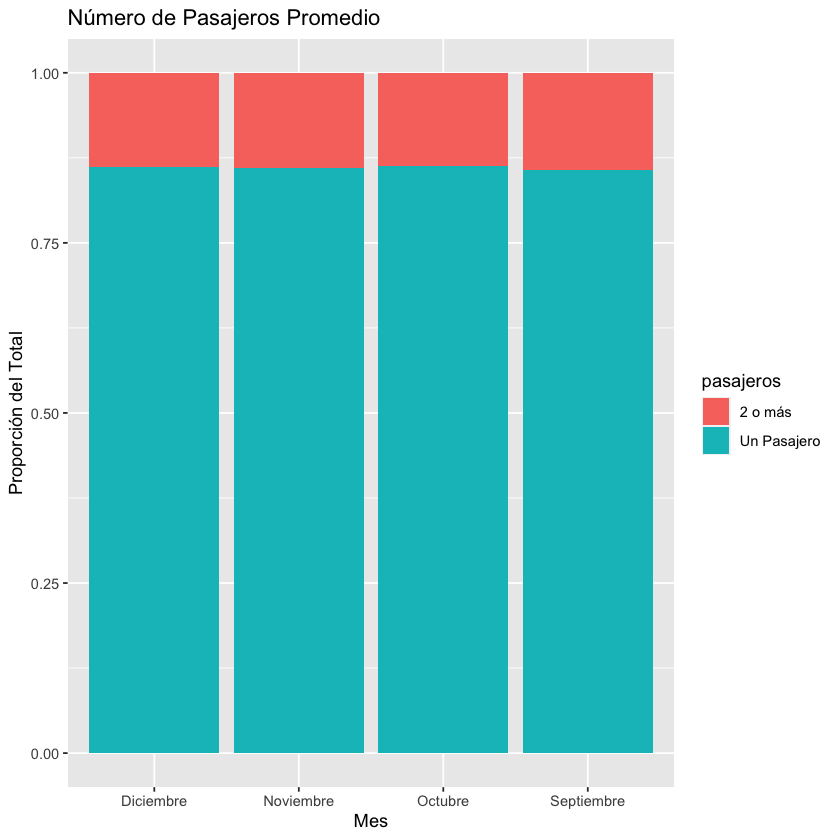

In [8]:
pasajeros <- rep(c("Un Pasajero", "2 o más"),4)
mes <- rep(c("Septiembre", "Octubre", "Noviembre", "Diciembre"), each=2)
proporciones <- c(.8578, .142169, .86355, .13644, .859564, .1404, .8609, .1390) #las proporciones fueron
#obtenidas manualmente explorando los datos.
passengers <- data.frame(pasajeros, mes, proporciones)
ggplot(passengers, aes(x = mes, y = proporciones, fill = pasajeros)) +
  geom_col() + 
  ggtitle("Número de Pasajeros Promedio") +
  labs(x = "Mes", y = "Proporción del Total")

### ¿A qué hora viajan los neoyorquinos?

Lo segundo que nos llamó la atención fueron los horarios más comunes. Al principio, pensamos que estarían distribuidos normalmente, pero resulta que casi tres cuartas partes de los viajes ocurren entre las tres de la tarde y las cinco de la mañana. Hay una cantidad sorprendente de movimiento en la noche. 

Para realizar esta gráfica fue necesario hacer algunos cálculos relativamente tediosos, descritos totalmente en el notebook [statistical_analysis_2.ipynb](https://github.com/prope-2020-gh-classroom/practica-final-por-equipos-verano-2020-itam-carlosgarza-3/blob/master/tercer_cuatrimestre/statistical_analysis_2.ipynb), pero se explican aquí algunos pasos.

El primer paso es extraer de la columna de lpep_pickup_datetime la hora exacta de salida y asignarla como una variable al dataframe original. Además, es necesario convertir esa variable a numérica. 

In [9]:
pickup <- data[,2] #elegimos esa columna: lpep_pickup_datatime
pickup_hour <- str_sub(pickup,-8,-7) #elegimos los caracteres correspondientes a la hora 
data$pickup_hour <- pickup_hour #la asignamos al dataframe
data$pickup_hour_numeric <- as.numeric(factor(data$pickup_hour)) #la convertimos a numérica
table(data$pickup_hour_numeric) #podemos evaluar su distribución


    1     2     3     4     5     6     7     8     9    10    11    12    13 
17767 12108  8053  5719  4193  3435  6811 17418 28804 30981 28011 26865 27108 
   14    15    16    17    18    19    20    21    22    23    24 
26404 30127 35475 38052 46618 50512 47799 40987 36400 31653 25702 

El segundo paso es agrupar a los viajeros en categorías. De manera quizá un poco arbitraria, decidimos que los que viajaran entre las 8 de la noche y las 5 de la mañana sería del grupo "Nocturno/Madrugada", los que viajan entre las 5 am y las 2 de la tarde serían del grupo "Matutino" y el resto del grupo "Vespertino". Creo que son categorías razonables y nos permiten visualizar algunos elementos interesantes de los datos. 

In [10]:
data$estilo <- ifelse(data$pickup_hour_numeric > 20 | data$pickup_hour_numeric < 5, "Nocturno/Madruagada", 
            ifelse(data$pickup_hour_numeric < 14 & data$pickup_hour_numeric >= 5, "Matutino", "Vespertino"))

In [11]:
table(data$estilo)


           Matutino Nocturno/Madruagada          Vespertino 
             173626              178389              274987 

Después hube de crear un nuevo dataframe con el formato adecuado para llegar a una visualización informativa. Una vez más, las proporciones fueron calculadas arduamente a mano y el proceso no se replicará aquí. 

In [12]:
horarios <- rep(c("Matutino", "Vespertino", "Nocturno/Madruagada"),4)
mes <- rep(c("Septiembre", "Octubre", "Noviembre", "Diciembre"), each=3)
proporciones <- c(.27488, .2953, .4298, .2848, .2789, .4363, .2763, .2859, .4378, .2711, .2781, .4507)

schedule  <- data.frame(horarios, mes, proporciones)
head(schedule)

,horarios,mes,proporciones
,<chr>,<chr>,<dbl>
1,Matutino,Septiembre,0.27488
2,Vespertino,Septiembre,0.29530
3,Nocturno/Madruagada,Septiembre,0.42980
4,Matutino,Octubre,0.28480
5,Vespertino,Octubre,0.27890
6,Nocturno/Madruagada,Octubre,0.43630


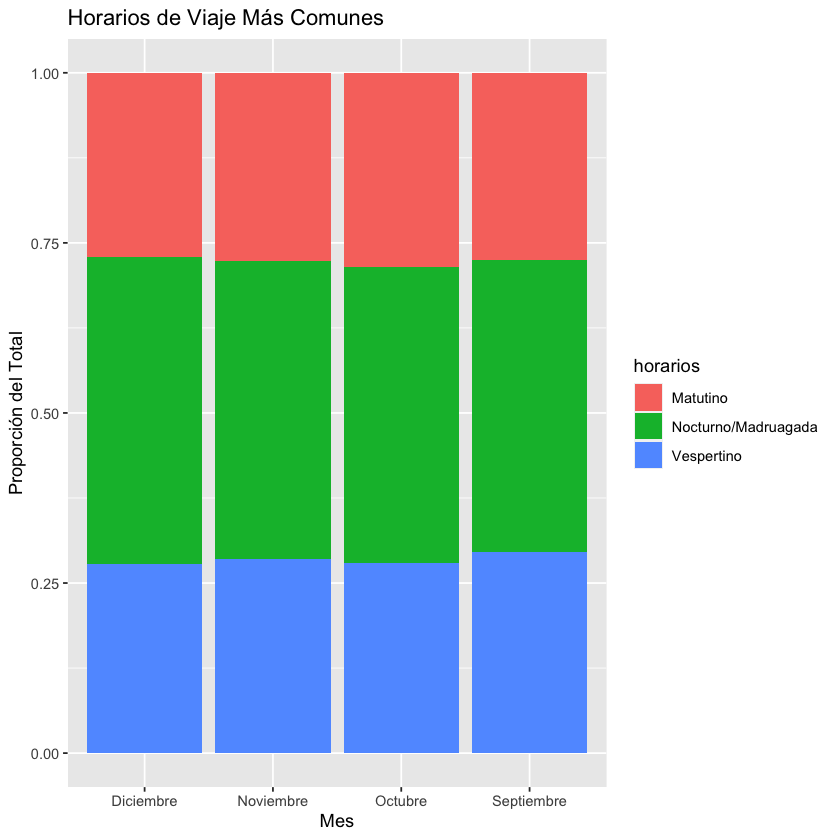

In [13]:
#Finalmente podemos visualizar la información
ggplot(schedule, aes(x = mes, y = proporciones, fill = horarios)) +
  geom_col() + 
  ggtitle("Horarios de Viaje Más Comunes") +
  labs(x = "Mes", y = "Proporción del Total")

¡Listo! Con esto podemos ver que prácticamente el 75% de los viajes son más en la tarde o en la noche que en los horarios de 5 am - 2 pm. En particular nos sorprendió descubrir que prácticamente la mitad de los viajes ocurren entre las ocho de la noche y las cinco de la madrugada. ¿Qué hace esa gente?

También realizamos estadística descriptiva de otras variables como la duración de los viajes, el costo promedio y demás. 

Por ejemplo, este es el análisis del costo total de los viajes. 

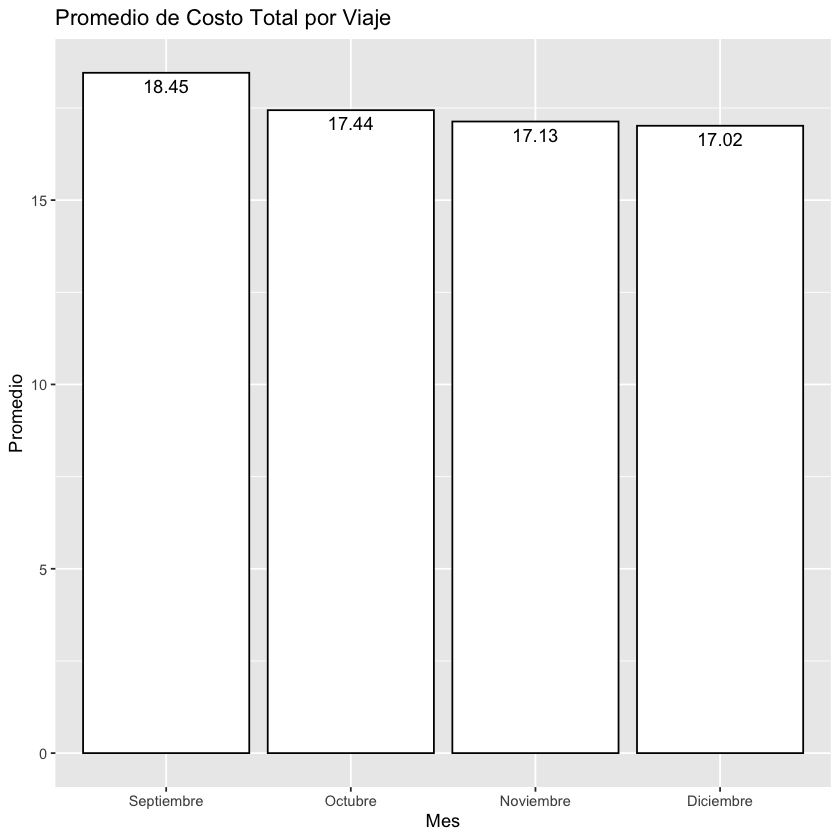

In [30]:
dist_sept <- mean(data[data$month == 'Septiembre', 8])
dist_oct <- mean(data[data$month == 'Octubre', 8])
dist_nov <- mean(data[data$month == 'Noviembre', 8])
dist_dic <- mean(data[data$month == 'Diciembre', 8])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios,2)), vjust = 1.5, colour = "black") +
  ggtitle("Promedio de Costo Total por Viaje") +
  theme_gray()

Realmente la mayoría de los viajes son de menos de 20 dólares. Al analizar la mediana, es posible ver que quizá algunos outliers estén empujando el costo hacia arriba. 

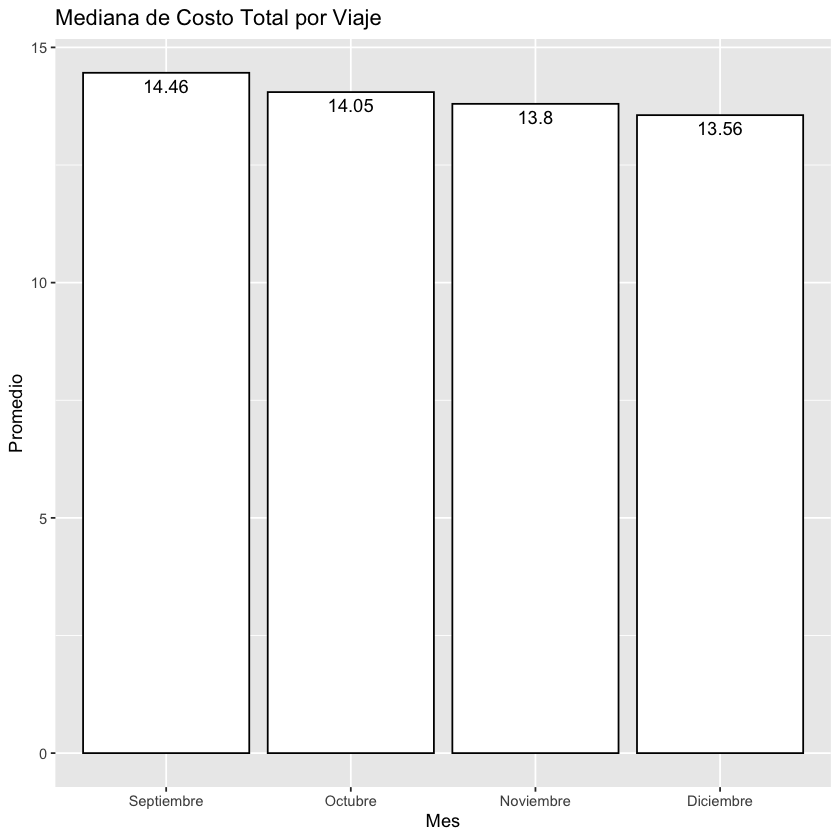

In [32]:
dist_sept <- median(data[data$month == 'Septiembre', 8])
dist_oct <- median(data[data$month == 'Octubre', 8])
dist_nov <- median(data[data$month == 'Noviembre', 8])
dist_dic <- median(data[data$month == 'Diciembre', 8])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios,2)), vjust = 1.5, colour = "black") +
  ggtitle("Mediana de Costo Total por Viaje") +
  theme_gray()

In [33]:
summary(data$total_amount)
#9,000 pesos por un taxi?

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.09    9.95   14.00   17.51   21.00  452.80 

Es posible analizar también la tendencia de la propina como porcentaje del total. 

In [35]:
summary(data$tip_pct)
#¿quién deja el 98% de propina?

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000415 0.1520913 0.1666667 0.1623381 0.1666667 0.9897928 

Fuera de algunos outliers, la propina es bastante estable. Esto se ilustrará de mejor manera en la siguiente sección, el análisis de regresión. 

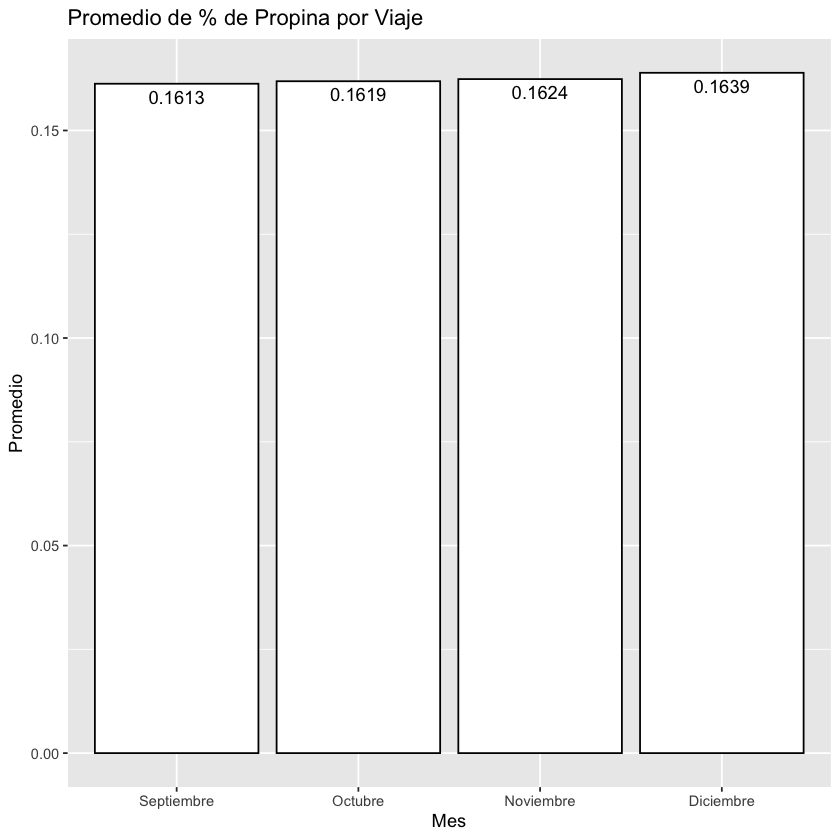

In [37]:
dist_sept <- mean(data[data$month == 'Septiembre', 12])
dist_oct <- mean(data[data$month == 'Octubre', 12])
dist_nov <- mean(data[data$month == 'Noviembre', 12])
dist_dic <- mean(data[data$month == 'Diciembre', 12])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios,4)), vjust = 1.5, colour = "black") +
  ggtitle("Promedio de % de Propina por Viaje") +
  theme_gray()

Analizar la mediana nos permite ver la estabilidad de esta variable. 

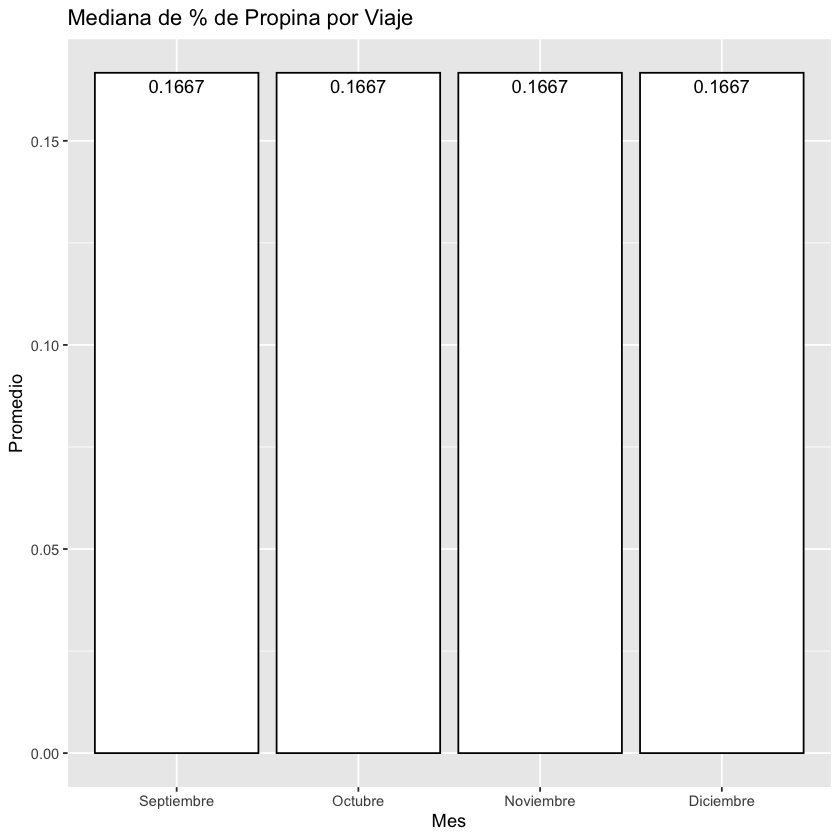

In [38]:
dist_sept <- median(data[data$month == 'Septiembre', 12])
dist_oct <- median(data[data$month == 'Octubre', 12])
dist_nov <- median(data[data$month == 'Noviembre', 12])
dist_dic <- median(data[data$month == 'Diciembre', 12])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios,4)), vjust = 1.5, colour = "black") +
  ggtitle("Mediana de % de Propina por Viaje") +
  theme_gray()

Se realizó un análisis descriptivo para otras variables mostradas en la presentación en el notebook [descriptive_statistics.ipynb](https://github.com/prope-2020-gh-classroom/practica-final-por-equipos-verano-2020-itam-carlosgarza-3/blob/master/tercer_cuatrimestre/descriptive_statistics.ipynb).

## Análisis de Regresión

### ¿Y qué factores explican el precio total o la propina?

La tercera cosa que nos interesó fue encontrar alguna visualización que me permitiera entender qué factores eran más relevantes en explicar el precio total y la cantidad de propina otorgada. 

Así fue como llegamos a las siguientes visualizaciones.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



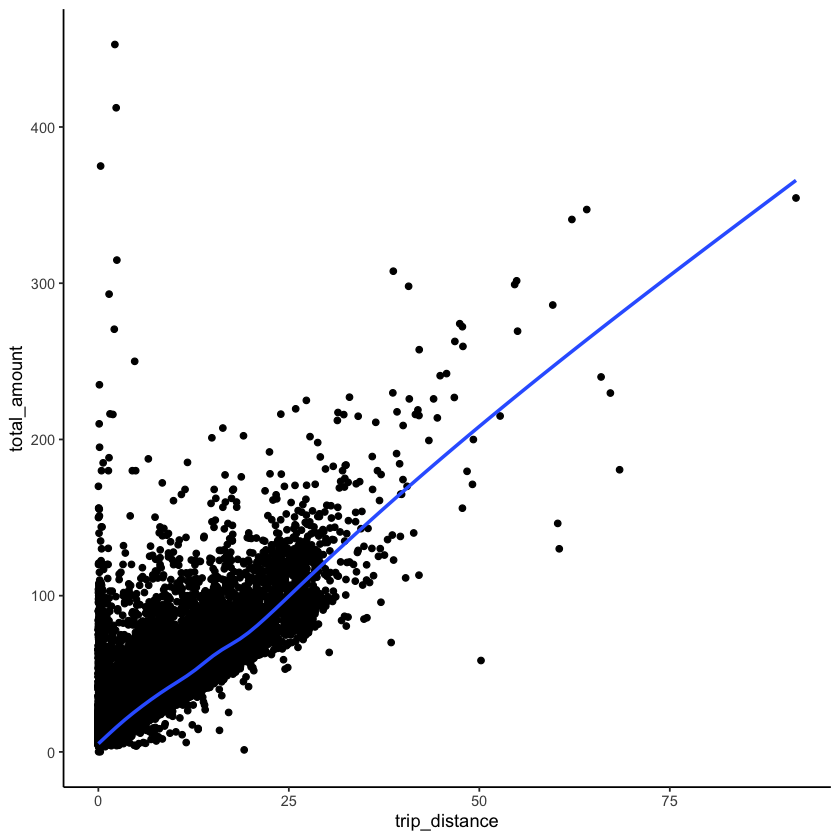

In [15]:
ggplot(data = data) + 
    geom_point(aes(x=trip_distance, y=total_amount)) +
    geom_smooth(aes(x=trip_distance, y=total_amount), se=FALSE) +
    theme_classic()

Es lógico que haya una relación de este tipo. Después de todo, ¡son taxis! Mientras más viajes, más te cobran. Las fluctuaciones en la recta al inicio de la gráfica quizá indiquen que te puden cobrar un poco más o menos dependiendo del tráfico, a pesar de que hayas recorrido la misma distancia. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



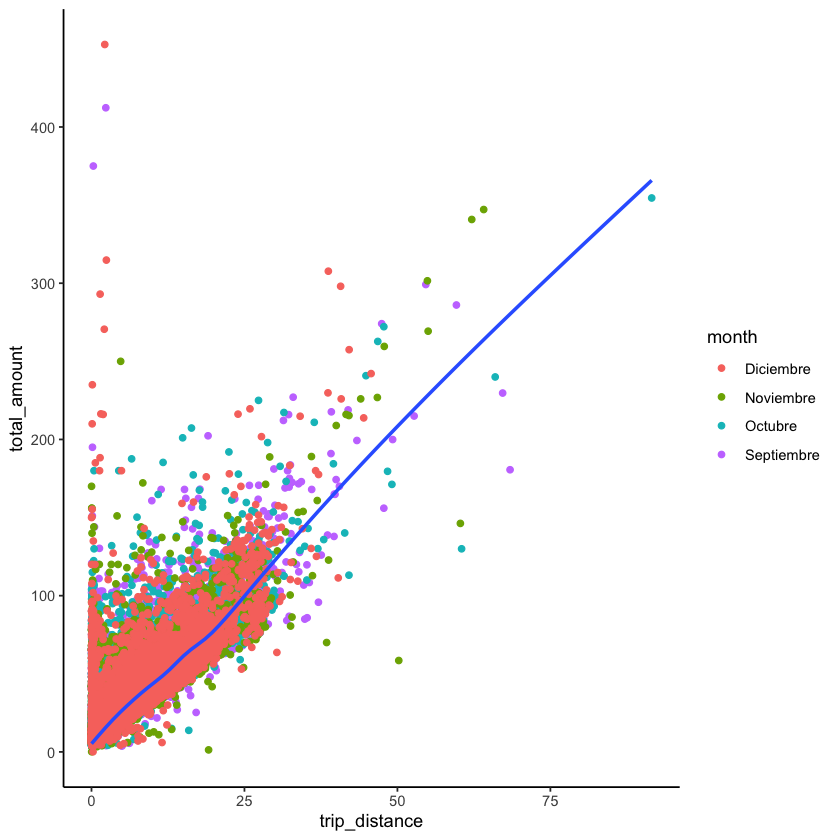

In [16]:
#podemos colorear los puntos por el mes al que pertenecen 
ggplot(data = data) + 
    geom_point(aes(x=trip_distance, y=total_amount, color=month)) +
    geom_smooth(aes(x=trip_distance, y=total_amount), se=FALSE) +
    theme_classic()

### ¿Los datos están bien?

Existe una gráfica cuyo significado no he podido descifrar perfectamente, aún después de analizar con cuidado los datos. Es la siguiente:

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



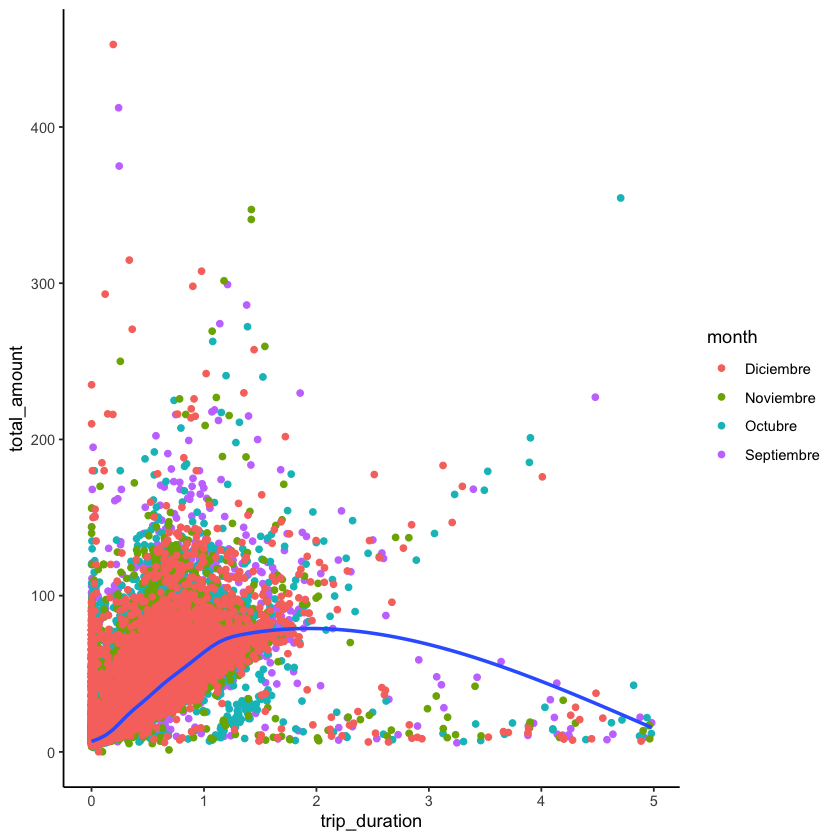

In [17]:
ggplot(data = data) + 
    geom_point(aes(x=trip_duration, y=total_amount, color=month)) +
    geom_smooth(aes(x=trip_duration, y=total_amount), se=FALSE) +
    theme_classic()

¿Por qué tiene esa forma? ¿Por qué hay viajes tan largos que cuestan menos que viajes tan cortos? El diccionario de datos no brinda demasiada información al respecto, y definitivamente es enigmático pensar que hay viajes de cinco horas con un costo inferior a viajes de 1 hora y media. Supongo que tendríamos que ir a NY para averiguarlo!

### ¿Son codos los neoyorquinos? ¿Dan mucha o poca propina? 

El análisis de la propina resultó ser bastante interesante porque descubrí que, no importa qué variable consideraras, la propina se mantiene prácticamente igual. Ilustraré este punto con las siguientes gráficas. 

Vale la pena comentar que la propina se considera como porcentaje del costo total, no como valor absoluto. Esto nos permite hacer un análisis más correcto. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



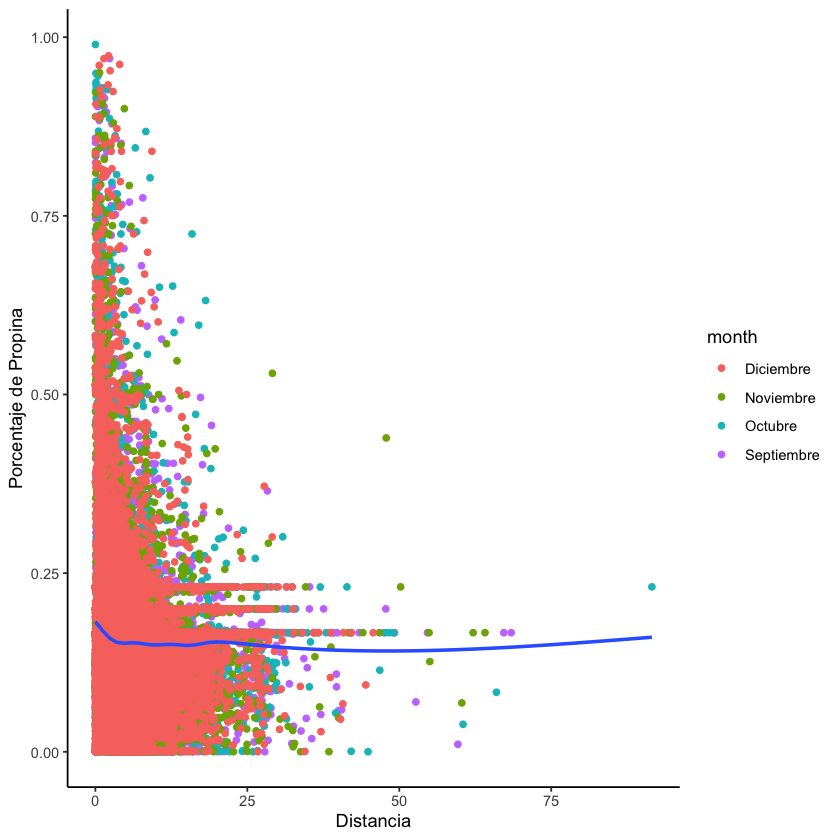

In [18]:
#la distancia no parece jugar un papel importante
ggplot(data = data) + 
    geom_point(aes(x=trip_distance, y=tip_pct, color=month)) +
    geom_smooth(aes(x=trip_distance, y=tip_pct), se=FALSE) +
    theme_classic() +
    labs(x="Distancia", y="Porcentaje de Propina", main="Distancia vs. Porcentaje de Propina")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



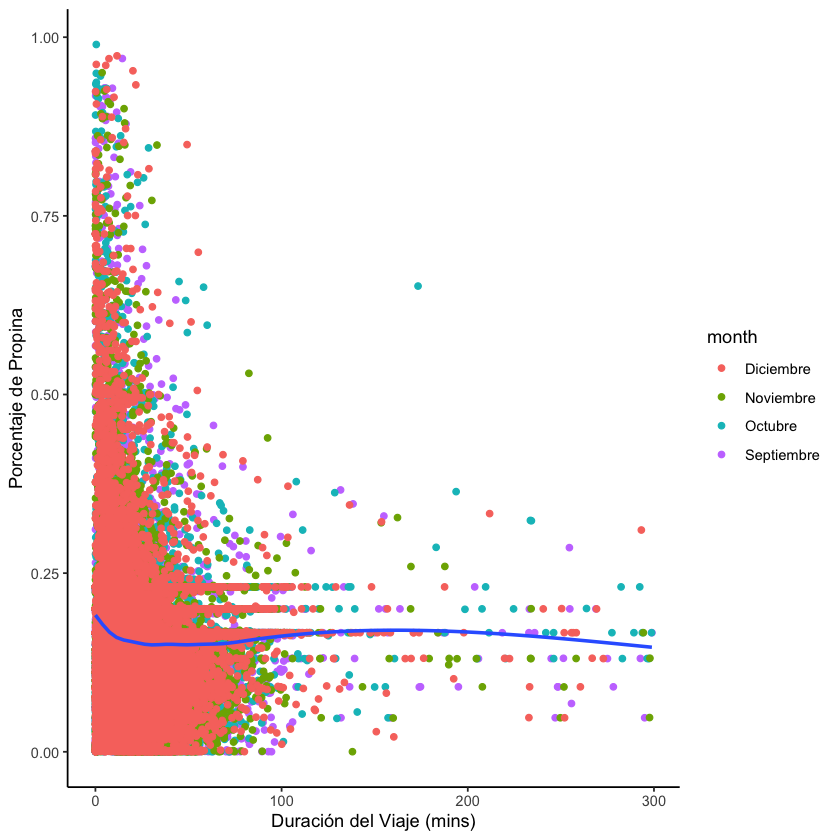

In [19]:
#la duración del viaje tampoco parece jugar un papel importante
ggplot(data = data) + 
    geom_point(aes(x=trip_duration*60, y=tip_pct, color=month)) +
    geom_smooth(aes(x=trip_duration*60, y=tip_pct), se=FALSE) +
    theme_classic() +
    labs(x="Duración del Viaje (mins)", y="Porcentaje de Propina", main="Duración vs. Porcentaje de Propina")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



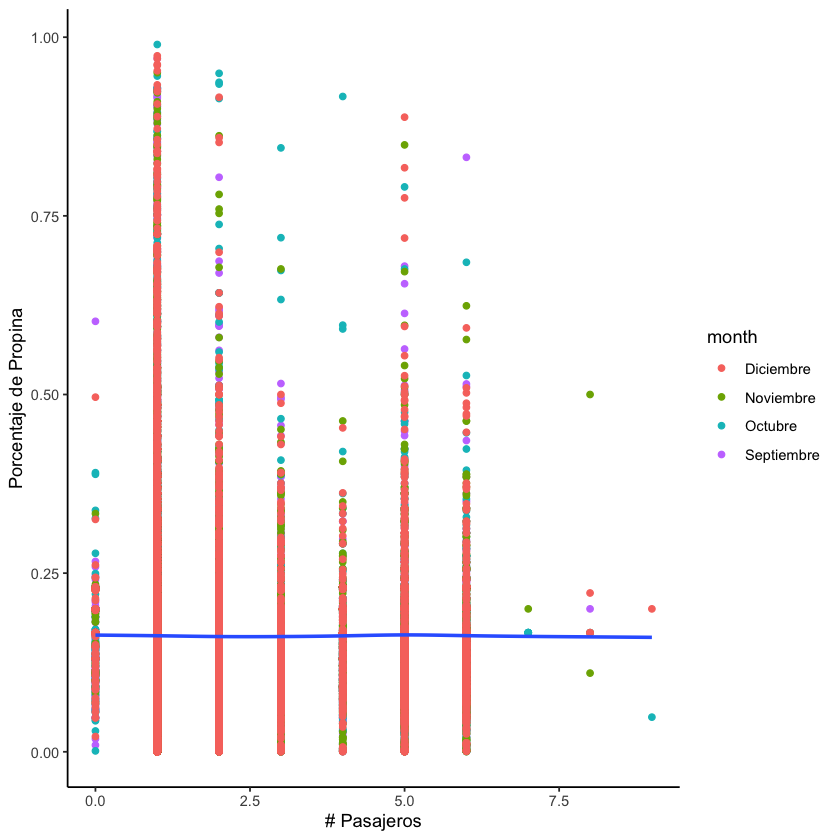

In [20]:
#el número de pasajeros tampoco parece influir mucho en la propina 
ggplot(data = data) + 
    geom_point(aes(x=passenger_count, y=tip_pct, color=month)) +
    geom_smooth(aes(x=passenger_count, y=tip_pct), se=FALSE) +
    theme_classic() +
    labs(x="# Pasajeros", y="Porcentaje de Propina", main="# Pasajeros vs. Porcentaje de Propina")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 313460 rows containing non-finite values (stat_smooth).”


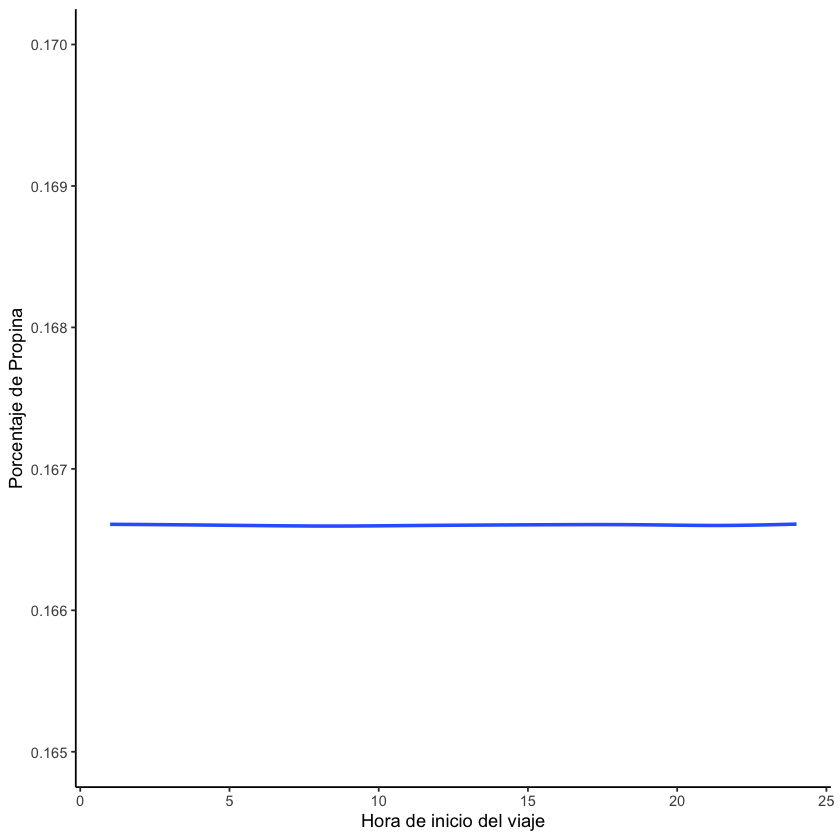

In [21]:
# ¿Y la hora en que la gente se sube al taxi? Tampoco...
ggplot(data = data) + 
    #geom_point(aes(x=pickup_hour, y=tip_pct)) +
    geom_smooth(aes(x=pickup_hour_numeric, y=tip_pct), se=FALSE) +
    ylim(.165, .170) + 
    theme_classic() +
    labs(x="Hora de inicio del viaje", y="Porcentaje de Propina", main="Hora del día vs. Porcentaje de Propina")

Esto nos llevó a concluir que la propina probablemente sea una cuota fija que los pasajeros se ven obligados a pagar, y que gira alrededor del 16%. 

### ¿Cuáles son los mejores predictores del precio total? 

Para concluir con esta sección queremos compartir algunos modelos de regresión lineal que desarrollamos para intentar determinar la mejor forma de predecir el precio total. 

En primer lugar, intentamos una combinación de distancia, duración del viaje y hora en que el viaje inició (en caso de que el tráfico jugara un papel importante. 

In [22]:
model <- lm(total_amount ~ trip_duration + trip_distance + pickup_hour_numeric, data = data)
summary(model)


Call:
lm(formula = total_amount ~ trip_duration + trip_distance + pickup_hour_numeric, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-109.41   -1.34   -0.51    0.89  438.17 

Coefficients:
                      Estimate Std. Error  t value Pr(>|t|)    
(Intercept)          4.6622199  0.0168258  277.088  < 2e-16 ***
trip_duration       19.6682469  0.0474209  414.759  < 2e-16 ***
trip_distance        2.8993534  0.0028488 1017.745  < 2e-16 ***
pickup_hour_numeric -0.0055914  0.0009164   -6.102 1.05e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.278 on 626998 degrees of freedom
Multiple R-squared:  0.8748,	Adjusted R-squared:  0.8748 
F-statistic: 1.46e+06 on 3 and 626998 DF,  p-value: < 2.2e-16


Podemos ver que no es un mal modelo. La R cuadrada (con todos los defectos que conlleva esa métrica) es de .8748, y el intercepto, el coeficiente de la duración y el de la distancia son significativamente distintos de cero. Es posible ver que la hora en que inicia un viaje no tiene impacto en el precio. El coeficiente no es significativamente distinto de cero. 

El siguiente modelo que desarrollamos nos permitió comprender que se puede obtener el mismo poder explicativo con la duración del viaje y la distancia únicamente. 

In [23]:
model <- lm(total_amount ~ trip_duration + trip_distance, data = data)
summary(model)


Call:
lm(formula = total_amount ~ trip_duration + trip_distance, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-109.48   -1.34   -0.51    0.89  438.13 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.575223   0.008934   512.1   <2e-16 ***
trip_duration 19.659185   0.047399   414.8   <2e-16 ***
trip_distance  2.900349   0.002844  1019.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.278 on 626999 degrees of freedom
Multiple R-squared:  0.8748,	Adjusted R-squared:  0.8748 
F-statistic: 2.191e+06 on 2 and 626999 DF,  p-value: < 2.2e-16


Podemos ver que la R cuadrada es igual y que los coeficientes siguen siendo significativamente distintos de cero. El valor p del estadístico F también tiene un p valor prácticamente igual a cero. 

¿Qué pasa si utilizamos solo la duración o solo la distancia? ¿Cuál de estos dos factores es más útil al intentar explicar el costo total? 

In [24]:
#solo la duración del viaje
model <- lm(total_amount ~ trip_duration, data = data)
summary(model)


Call:
lm(formula = total_amount ~ trip_duration, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-275.90   -2.39   -1.08    0.80  437.40 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.50543    0.01457   309.3   <2e-16 ***
trip_duration 56.36642    0.05028  1121.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.975 on 627000 degrees of freedom
Multiple R-squared:  0.6672,	Adjusted R-squared:  0.6672 
F-statistic: 1.257e+06 on 1 and 627000 DF,  p-value: < 2.2e-16


Vemos que el poder explicativo del modelo cayó ligeramente, aunque los coeficientes son significativamente distintos de cero. 

En realidad, la distancia y no la duración del viaje es lo que tiene el mayor explicativo, como se muestra a continuación. 

In [25]:
model <- lm(total_amount ~ trip_distance, data = data)
summary(model)


Call:
lm(formula = total_amount ~ trip_distance, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-138.66   -2.04   -0.80    1.30  438.05 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.516670   0.008590   758.6   <2e-16 ***
trip_distance 3.796233   0.002089  1817.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.829 on 627000 degrees of freedom
Multiple R-squared:  0.8405,	Adjusted R-squared:  0.8405 
F-statistic: 3.303e+06 on 1 and 627000 DF,  p-value: < 2.2e-16


La precisión es casi la misma que el mejor modelo. La distancia y no la duración del viaje es el factor más importante al determinar el precio, lo cual nos ayuda a entender que los viajes probablemente se cobran por millas recorridas y no por minutos en el carro. ¿Será por eso que la hora en que inició el viaje es irrelevante para determinar el precio? Si solo te cobran por millas y no por minutos, entonces da igual que inicies tu viaje en hora pico que en hora no pico. 

Quizá la siguiente gráfica ayude a entender la relación entra ambas variables. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



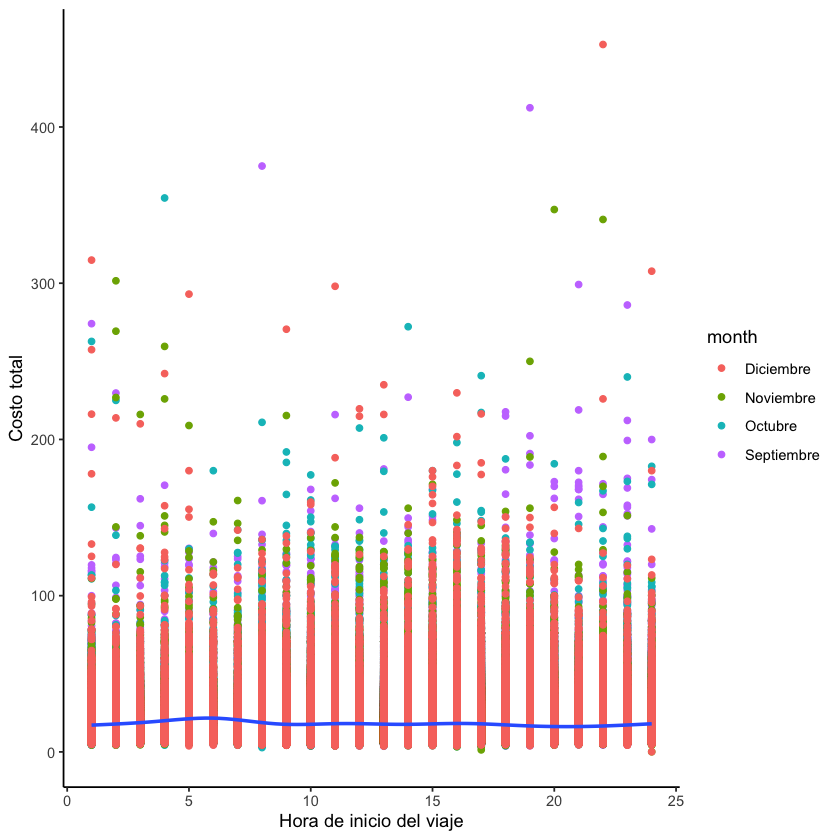

In [26]:
ggplot(data = data) + 
    geom_point(aes(x=pickup_hour_numeric, y=total_amount, color=month)) +
    geom_smooth(aes(x=pickup_hour_numeric, y=total_amount), se=FALSE) +
    theme_classic() +
    labs(x="Hora de inicio del viaje", y="Costo total", main="Hora de viaje vs. Costo Total")

Una pregunta que surge al ver esta gráfica es: ¿Cómo se vería esta gráfica para la comparación entre hora de inicio del viaje y duración total? ¿El tráfico tendrá un impacto significativo en los neoyorquinos? 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



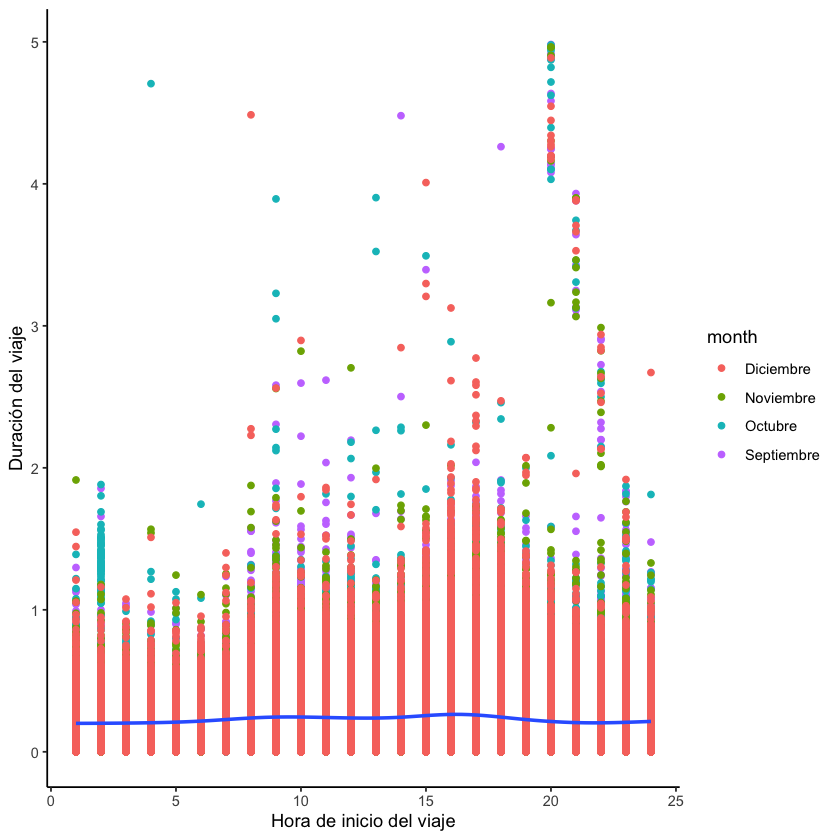

In [27]:
ggplot(data = data) + 
    geom_point(aes(x=pickup_hour_numeric, y=trip_duration, color=month)) +
    geom_smooth(aes(x=pickup_hour_numeric, y=trip_duration), se=FALSE) +
    theme_classic() +
    labs(x="Hora de inicio del viaje", y="Duración del viaje", main="Hora de viaje vs. Duración")

En efecto, los viajes por lo general duran lo mismo. Si recordamos el análisis realizado anteriormente, es porque en general la gran mayoría de los viajes son cortos. Son viajes sobre distancias pequeñas, por lo que la hora no parece tener una gran injerencia ni en la duración ni en el costo total. 

## Conclusiones

* Se realizó un estudio de estadística descriptiva y de regresión lineal de los viajes de Taxis en NYC para el año 2019. Se realizó en primera instancia un análisis exploratorio y de limpieza de los datos y después se procedió a entender mejor las distribuciones de las variables e incluso a intentar descubrir cuáles son los mejores predictores del precio. 

* Descubrimos que la propina probablemente sea un factor fijo dada su invarianza y que los mejores predictores del precio total son la combinación entre la duración del viaje y la distancia recorrida, siendo la distancia recorrida el factor más importante de los dos. La hora del viaje no juega un papel importante en este análisis.

* Existen más posibilidades no exploradas por el equipo para analizar estos viajes como: combinar esta base de datos con una de coordenadas de NYC para graficar las rutas más comunes en un mapa de calor, realizar pruebas de hipótesis para comparar las medias entre distintos meses y crear más variables derivadas para intentar mejorar la predicción del precio total. 